In [1]:
# Keras is a python deep learning library built on top of tensorflow

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import os
import numpy as np

Using TensorFlow backend.


In [2]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [3]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'softmax', units=18)) 
 


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_set = train_datagen.flow_from_directory(
        r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/Dataset/Fruit/Training',
        target_size=(150, 150),
        class_mode='categorical')

Found 9310 images belonging to 18 classes.


In [7]:
test_set = train_datagen.flow_from_directory(
        r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/Dataset/Fruit/Test',
        target_size=(150, 150),
        class_mode='categorical')

Found 3119 images belonging to 18 classes.


In [8]:
model.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set)


Epoch 1/5
291/291 [==============================] - 784s 3s/step - loss: 1.1143 - acc: 0.5970 - val_loss: 0.5266 - val_acc: 0.8217
Epoch 2/5
291/291 [==============================] - 777s 3s/step - loss: 0.2417 - acc: 0.9125 - val_loss: 0.3401 - val_acc: 0.8695
Epoch 3/5
291/291 [==============================] - 770s 3s/step - loss: 0.1244 - acc: 0.9616 - val_loss: 0.1863 - val_acc: 0.9372
Epoch 4/5
291/291 [==============================] - 1084s 4s/step - loss: 0.1049 - acc: 0.9627 - val_loss: 0.2328 - val_acc: 0.9218
Epoch 5/5
291/291 [==============================] - 1094s 4s/step - loss: 0.0579 - acc: 0.9814 - val_loss: 0.1069 - val_acc: 0.9651


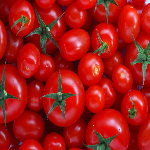

In [10]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img( r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/Dataset/Fruit/inference/tomato.jpg',target_size =(150,150))

test_image

In [11]:
## Convert image to array
test_image = image.img_to_array(test_image)

test_image=test_image.reshape(1,150, 150, 3)

In [12]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [13]:
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.]], dtype=float32)

In [14]:
result=result.argmax()

result

16

In [15]:
label_map = (train_set.class_indices)
print(label_map)

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Banana': 10, 'Banana Red': 11, 'Tomato 1': 12, 'Tomato 2': 13, 'Tomato 3': 14, 'Tomato 4': 15, 'Tomato Cherry Red': 16, 'Tomato Maroon': 17}


In [16]:
## Class label 

if result == 0:
    prediction = 'Apple Braeburn'
elif result == 1:
    prediction = 'Apple Golden 1'
elif result == 2:
    prediction = 'Apple Golden 2'
elif result == 3:
    prediction = 'Apple Golden 3'
elif result == 4:
    prediction = 'Apple Granny Smith'
elif result == 5:
    prediction = 'Apple Red 1'
elif result == 6:
    prediction = 'Apple Red 2'
elif result == 7:
    prediction = 'Apple Red 3'
elif result == 8:
    prediction = 'Apple Red Delicious'
elif result == 9:
    prediction = 'Apple Red Yellow'
elif result == 10:
    prediction = 'Banana'
elif result == 11:
    prediction = 'Banana Red'
elif result == 12:
    prediction = 'Tomato 1'
elif result == 13:
    prediction = 'Tomato 2'
elif result == 14:
    prediction = 'Tomato 3'
elif result == 15:
    prediction = 'Tomato 4'
elif result == 16:
    prediction = 'Tomato Cherry Red'
else:
    prediction = 'Tomato Maroon'
    
    

In [17]:
prediction

'Tomato Cherry Red'